In [234]:
import pandas as pd
import networkx as nx

# for bipartite projection
from networkx.algorithms import bipartite

In [235]:
# for graph visualization
import numpy as np
from IPython.display import SVG 
from sknetwork.visualization import svg_graph 
from sknetwork.data import Bunch 
from sknetwork.ranking import PageRank 
from scipy.sparse import csr_matrix

def draw_graph(G, show_names=False, node_size=1, font_size=10, edge_width=0.5):

    adjacency = nx.to_scipy_sparse_array(G, nodelist=None, dtype=None, weight='weight', format='csr')
    adjacency = csr_matrix(adjacency) # fix to weird sknetwork-csr issue; comment out to troubleshoot
    
    names = np.array(list(G.nodes))
    
    graph = Bunch()
    graph.adjacency = adjacency
    graph.names = np.array(names)
    
    pagerank = PageRank()
    scores = pagerank.fit_transform(adjacency)

    if show_names:
        
        image = svg_graph(graph.adjacency, font_size=font_size, node_size=node_size, names=graph.names, width=700, height=500, scores=scores, edge_width=edge_width)
    
    else:
        
        image = svg_graph(graph.adjacency, node_size=node_size, width=700, height=500, scores=scores, edge_width=edge_width)
    
    return SVG(image)

# Create Scale Dictionary

In [236]:
scales = {}

# all C scales
scales['Ionian'] = 'C D E F G A B C'
scales['Dorian'] = 'C D Eb F G A Bb C'
scales['Phrygian'] = 'C Db Eb F G Ab Bb C'
scales['Lydian'] = 'C D E F# G A B C'
scales['Mixolydian'] = 'C D E F G A Bb C'
scales['Aeolian'] = 'C D Eb F G Ab Bb C'
scales['Locrian'] = 'C Db Eb F Gb Ab Bb C'
scales['Jazz Minor'] = 'C D Eb F G A B C'
scales['Jazz Minor Mode 3'] = 'C D E F# G# A B C'
scales['Jazz Minor Mode 4'] = 'C D E F# G A Bb C'
scales['Jazz Minor Mode 7'] = 'C Db Eb E Gb Ab Bb C'
scales['Harmonic Minor'] = 'C D Eb F G Ab B C'
scales['Harmonic Minor Mode 3'] = 'C D E F G# A B C'
scales['Harmonic Minor Mode 5'] = 'C Db E F G Ab Bb C'
scales['Harmonic Minor Mode 6'] = 'C D# E F# G A B C'
scales['Harmonic Major'] = 'C D E F G Ab B C'
scales['Harmonic Major Mode 4'] = 'C D Eb F# G A B C'
scales['Harmonic Major Mode 5'] = 'C Db E F G A Bb C'
scales['Harmonic Major Mode 6'] = 'C D# E F# G# A B C'
scales['Major Pentatonic'] = 'C D E G A C'
scales['Minor Pentatonic'] = 'C Eb F G Bb C'
scales['Major Blues'] = 'C D Eb E G A C'
scales['Minor Blues'] = 'C Eb F Gb G Bb C'
scales['Blues Scale'] = 'C Eb E F Gb G Bb C'


scales

{'Ionian': 'C D E F G A B C',
 'Dorian': 'C D Eb F G A Bb C',
 'Phrygian': 'C Db Eb F G Ab Bb C',
 'Lydian': 'C D E F# G A B C',
 'Mixolydian': 'C D E F G A Bb C',
 'Aeolian': 'C D Eb F G Ab Bb C',
 'Locrian': 'C Db Eb F Gb Ab Bb C',
 'Jazz Minor': 'C D Eb F G A B C',
 'Jazz Minor Mode 3': 'C D E F# G# A B C',
 'Jazz Minor Mode 4': 'C D E F# G A Bb C',
 'Jazz Minor Mode 7': 'C Db Eb E Gb Ab Bb C',
 'Harmonic Minor': 'C D Eb F G Ab B C',
 'Harmonic Minor Mode 3': 'C D E F G# A B C',
 'Harmonic Minor Mode 5': 'C Db E F G Ab Bb C',
 'Harmonic Minor Mode 6': 'C D# E F# G A B C',
 'Harmonic Major': 'C D E F G Ab B C',
 'Harmonic Major Mode 4': 'C D Eb F# G A B C',
 'Harmonic Major Mode 5': 'C Db E F G A Bb C',
 'Harmonic Major Mode 6': 'C D# E F# G# A B C',
 'Major Pentatonic': 'C D E G A C',
 'Minor Pentatonic': 'C Eb F G Bb C',
 'Major Blues': 'C D Eb E G A C',
 'Minor Blues': 'C Eb F Gb G Bb C',
 'Blues Scale': 'C Eb E F Gb G Bb C'}

# Scale Similarity (NLP)

In [238]:
scale_df = pd.DataFrame([scales]).T
scale_df.columns = ['notes']

scale_df.head()

,notes
Ionian,C D E F G A B C
Dorian,C D Eb F G A Bb C
Phrygian,C Db Eb F G Ab Bb C
Lydian,C D E F# G A B C
Mixolydian,C D E F G A Bb C


In [239]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [241]:
def tokenizer(string):
    
    return string.split()

In [242]:
# capture tfidf values from scales
tfidf = TfidfVectorizer(tokenizer=tokenizer, token_pattern=None, ngram_range=(1,1), lowercase=True, sublinear_tf=True)
tfidf_docs = tfidf.fit_transform(scale_df['notes'])
tfidf_df = pd.DataFrame(tfidf_docs.toarray(), index=scale_df.index, columns=tfidf.vocabulary_)
tfidf_df.sort_index(inplace=True)
tfidf_df.head()

,c,d,e,f,g,a,b,eb,bb,db,ab,f#,gb,g#,d#
Aeolian,0.000000,0.493617,0.000000,0.381599,0.390648,0.348582,0.0,0.0,0.000000,0.381599,0.333692,0.000000,0.282207,0.0,0.000000
Blues Scale,0.000000,0.000000,0.000000,0.362417,0.371011,0.000000,0.0,0.0,0.316918,0.362417,0.316918,0.000000,0.268022,0.0,0.571794
Dorian,0.372044,0.000000,0.000000,0.407283,0.416941,0.372044,0.0,0.0,0.000000,0.407283,0.356152,0.000000,0.301202,0.0,0.000000
Harmonic Major,0.000000,0.494450,0.420851,0.000000,0.391307,0.349170,0.0,0.0,0.334255,0.000000,0.334255,0.000000,0.282684,0.0,0.000000
Harmonic Major Mode 4,0.336606,0.000000,0.405707,0.000000,0.377226,0.336606,0.0,0.0,0.000000,0.368488,0.000000,0.506408,0.272511,0.0,0.000000


In [243]:
# capture similarity, using tfidf values
similarity_matrix = cosine_similarity(tfidf_df)
similarity_df = pd.DataFrame(similarity_matrix, index=tfidf_df.index, columns=tfidf_df.index)
similarity_df.head()

,Aeolian,Blues Scale,Dorian,Harmonic Major,Harmonic Major Mode 4,Harmonic Major Mode 5,Harmonic Major Mode 6,Harmonic Minor,Harmonic Minor Mode 3,Harmonic Minor Mode 5,...,Jazz Minor Mode 4,Jazz Minor Mode 7,Locrian,Lydian,Major Blues,Major Pentatonic,Minor Blues,Minor Pentatonic,Mixolydian,Phrygian
Aeolian,1.000000,0.602922,0.807250,0.709960,0.482217,0.480718,0.114306,0.841480,0.348704,0.681097,...,0.497572,0.566094,0.657781,0.347194,0.583581,0.461878,0.635690,0.796764,0.664938,0.804608
Blues Scale,0.602922,1.000000,0.643502,0.432808,0.346541,0.560469,0.187772,0.457607,0.322447,0.530081,...,0.462947,0.717633,0.717633,0.320272,0.542971,0.426063,0.948453,0.756713,0.621008,0.552215
Dorian,0.807250,0.643502,1.000000,0.497249,0.639906,0.640509,0.219139,0.641987,0.489494,0.485255,...,0.660283,0.390062,0.487921,0.497845,0.774417,0.662292,0.678476,0.850392,0.850893,0.620577
Harmonic Major,0.709960,0.432808,0.497249,1.000000,0.512921,0.447799,0.330484,0.873386,0.610147,0.650346,...,0.464210,0.418680,0.418680,0.630787,0.544452,0.608286,0.344641,0.431968,0.628687,0.538773
Harmonic Major Mode 4,0.482217,0.346541,0.639906,0.512921,1.000000,0.335669,0.524862,0.642815,0.499797,0.208424,...,0.721896,0.237124,0.237124,0.878364,0.700651,0.599206,0.365375,0.457955,0.499677,0.334195


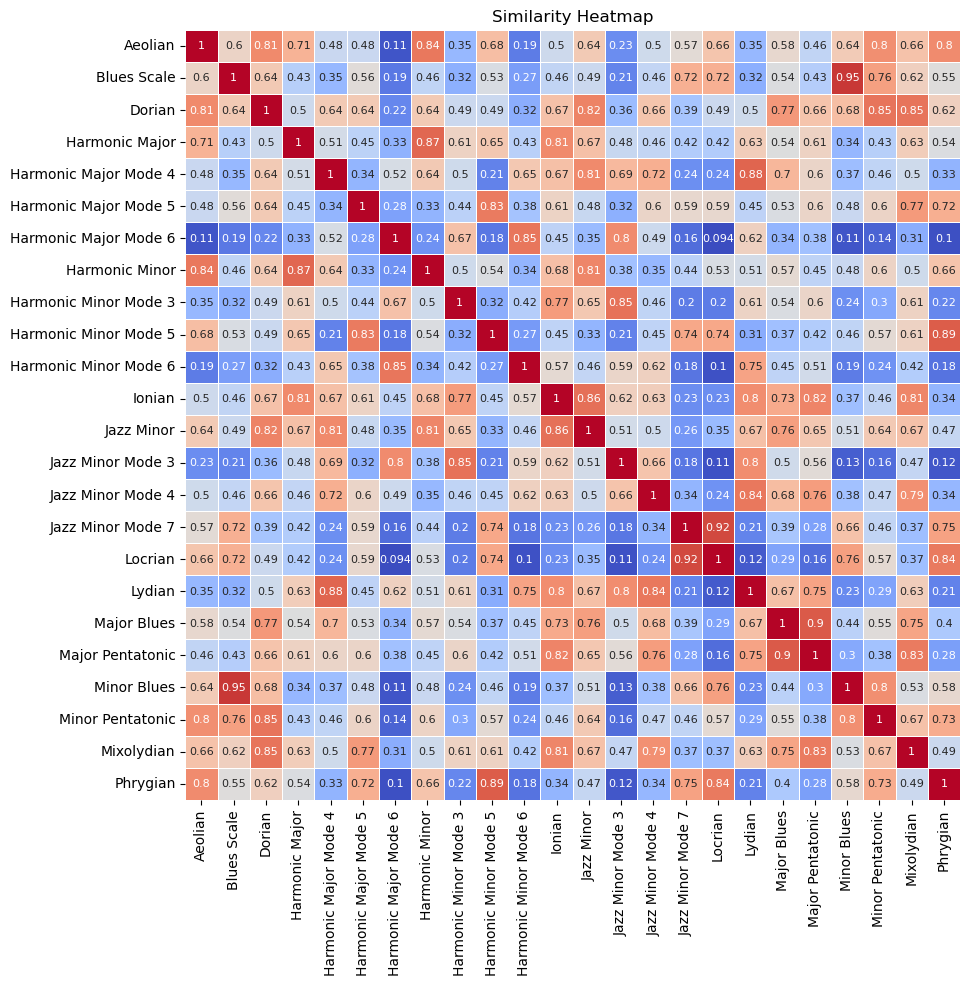

In [245]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
sns.heatmap(similarity_df, annot=True, cmap='coolwarm', linewidths=0.5, cbar=False, annot_kws={"size": 8})
plt.title('Similarity Heatmap')
plt.show()

In [246]:
def get_similar_scales(scale):
    
    title = 'Most Similar Scales for {}'.format(scale)

    similarity_df[scale].sort_values(ascending=False)[1:11].plot.barh(title=title).invert_yaxis()

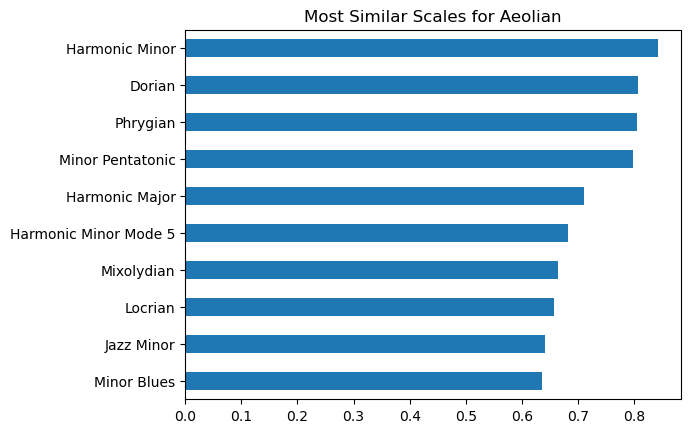

In [247]:
get_similar_scales('Aeolian')

In [248]:
scales['Aeolian'], scales['Harmonic Minor'], scales['Dorian'], scales['Phrygian']

('C D Eb F G Ab Bb C',
 'C D Eb F G Ab B C',
 'C D Eb F G A Bb C',
 'C Db Eb F G Ab Bb C')

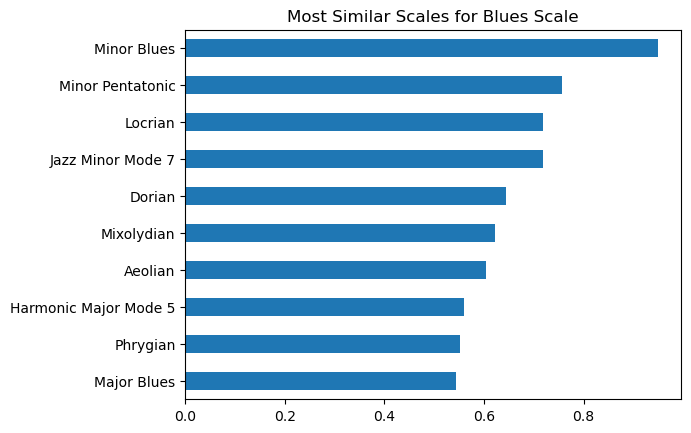

In [249]:
get_similar_scales('Blues Scale')

In [250]:
scales['Blues Scale'], scales['Minor Blues'], scales['Locrian'], scales['Jazz Minor Mode 7']

('C Eb E F Gb G Bb C',
 'C Eb F Gb G Bb C',
 'C Db Eb F Gb Ab Bb C',
 'C Db Eb E Gb Ab Bb C')

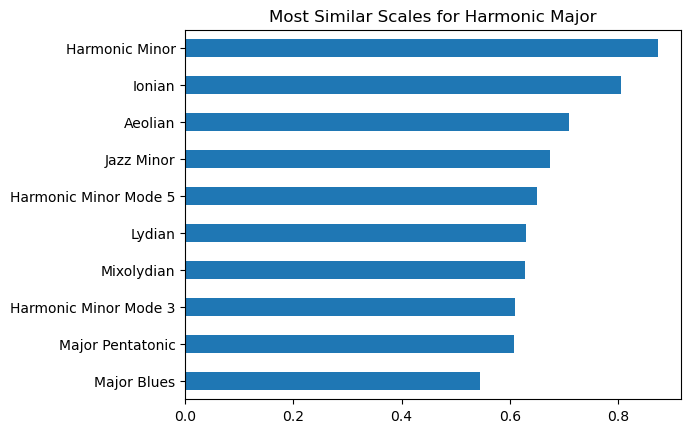

In [251]:
get_similar_scales('Harmonic Major')

In [252]:
scales['Harmonic Major'], scales['Harmonic Minor'], scales['Ionian'], scales['Aeolian']

('C D E F G Ab B C',
 'C D Eb F G Ab B C',
 'C D E F G A B C',
 'C D Eb F G Ab Bb C')

# Create Scale Edgelist (Graph Starts Here)

In [253]:
sorted(scales.keys())

['Aeolian',
 'Blues Scale',
 'Dorian',
 'Harmonic Major',
 'Harmonic Major Mode 4',
 'Harmonic Major Mode 5',
 'Harmonic Major Mode 6',
 'Harmonic Minor',
 'Harmonic Minor Mode 3',
 'Harmonic Minor Mode 5',
 'Harmonic Minor Mode 6',
 'Ionian',
 'Jazz Minor',
 'Jazz Minor Mode 3',
 'Jazz Minor Mode 4',
 'Jazz Minor Mode 7',
 'Locrian',
 'Lydian',
 'Major Blues',
 'Major Pentatonic',
 'Minor Blues',
 'Minor Pentatonic',
 'Mixolydian',
 'Phrygian']

In [259]:
edgelist = []

for scale in sorted(scales.keys()):
    print(scale)
    
    notes = scales[scale]
    notes = notes.split()
    print(notes)
    print()
    
    # add to edgelist
    for note in notes:
        edge = (scale, note)
        edgelist.append(edge)

Aeolian
['C', 'D', 'Eb', 'F', 'G', 'Ab', 'Bb', 'C']

Blues Scale
['C', 'Eb', 'E', 'F', 'Gb', 'G', 'Bb', 'C']

Dorian
['C', 'D', 'Eb', 'F', 'G', 'A', 'Bb', 'C']

Harmonic Major
['C', 'D', 'E', 'F', 'G', 'Ab', 'B', 'C']

Harmonic Major Mode 4
['C', 'D', 'Eb', 'F#', 'G', 'A', 'B', 'C']

Harmonic Major Mode 5
['C', 'Db', 'E', 'F', 'G', 'A', 'Bb', 'C']

Harmonic Major Mode 6
['C', 'D#', 'E', 'F#', 'G#', 'A', 'B', 'C']

Harmonic Minor
['C', 'D', 'Eb', 'F', 'G', 'Ab', 'B', 'C']

Harmonic Minor Mode 3
['C', 'D', 'E', 'F', 'G#', 'A', 'B', 'C']

Harmonic Minor Mode 5
['C', 'Db', 'E', 'F', 'G', 'Ab', 'Bb', 'C']

Harmonic Minor Mode 6
['C', 'D#', 'E', 'F#', 'G', 'A', 'B', 'C']

Ionian
['C', 'D', 'E', 'F', 'G', 'A', 'B', 'C']

Jazz Minor
['C', 'D', 'Eb', 'F', 'G', 'A', 'B', 'C']

Jazz Minor Mode 3
['C', 'D', 'E', 'F#', 'G#', 'A', 'B', 'C']

Jazz Minor Mode 4
['C', 'D', 'E', 'F#', 'G', 'A', 'Bb', 'C']

Jazz Minor Mode 7
['C', 'Db', 'Eb', 'E', 'Gb', 'Ab', 'Bb', 'C']

Locrian
['C', 'Db', 'Eb', 'F', 'G

In [260]:
edgelist

[('Aeolian', 'C'),
 ('Aeolian', 'D'),
 ('Aeolian', 'Eb'),
 ('Aeolian', 'F'),
 ('Aeolian', 'G'),
 ('Aeolian', 'Ab'),
 ('Aeolian', 'Bb'),
 ('Aeolian', 'C'),
 ('Blues Scale', 'C'),
 ('Blues Scale', 'Eb'),
 ('Blues Scale', 'E'),
 ('Blues Scale', 'F'),
 ('Blues Scale', 'Gb'),
 ('Blues Scale', 'G'),
 ('Blues Scale', 'Bb'),
 ('Blues Scale', 'C'),
 ('Dorian', 'C'),
 ('Dorian', 'D'),
 ('Dorian', 'Eb'),
 ('Dorian', 'F'),
 ('Dorian', 'G'),
 ('Dorian', 'A'),
 ('Dorian', 'Bb'),
 ('Dorian', 'C'),
 ('Harmonic Major', 'C'),
 ('Harmonic Major', 'D'),
 ('Harmonic Major', 'E'),
 ('Harmonic Major', 'F'),
 ('Harmonic Major', 'G'),
 ('Harmonic Major', 'Ab'),
 ('Harmonic Major', 'B'),
 ('Harmonic Major', 'C'),
 ('Harmonic Major Mode 4', 'C'),
 ('Harmonic Major Mode 4', 'D'),
 ('Harmonic Major Mode 4', 'Eb'),
 ('Harmonic Major Mode 4', 'F#'),
 ('Harmonic Major Mode 4', 'G'),
 ('Harmonic Major Mode 4', 'A'),
 ('Harmonic Major Mode 4', 'B'),
 ('Harmonic Major Mode 4', 'C'),
 ('Harmonic Major Mode 5', 'C'),
 ('H

# Create Graph and Visualize

In [261]:
def show_top_pagerank(G):

    pr_df = pd.DataFrame([nx.pagerank(G)]).T

    pr_df.columns = ['pagerank']
    pr_df.sort_values('pagerank', ascending=False, inplace=True)

    return pr_df[0:10].plot.barh().invert_yaxis()

In [262]:
G = nx.from_edgelist(edgelist) # skipped the pandas dataframe this time

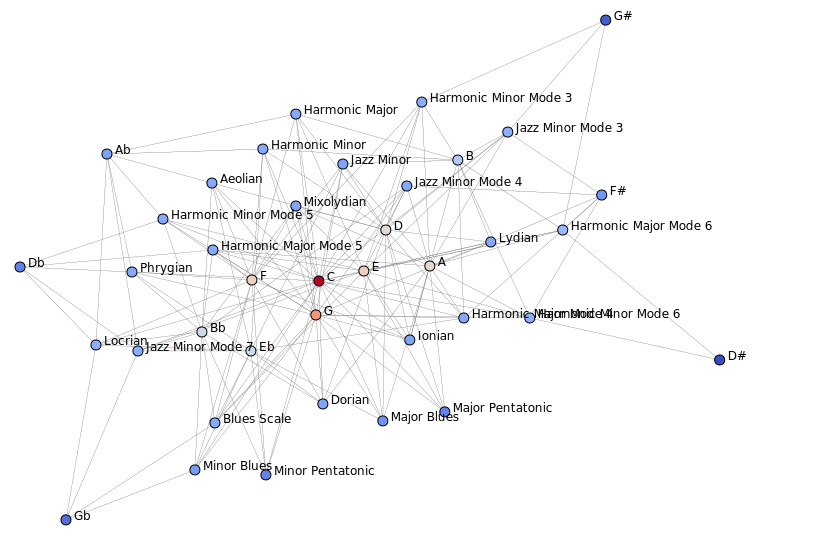

In [265]:
draw_graph(G, show_names=True, node_size=5, font_size=12, edge_width=0.2)

In [266]:
sorted(G.nodes)

['A',
 'Ab',
 'Aeolian',
 'B',
 'Bb',
 'Blues Scale',
 'C',
 'D',
 'D#',
 'Db',
 'Dorian',
 'E',
 'Eb',
 'F',
 'F#',
 'G',
 'G#',
 'Gb',
 'Harmonic Major',
 'Harmonic Major Mode 4',
 'Harmonic Major Mode 5',
 'Harmonic Major Mode 6',
 'Harmonic Minor',
 'Harmonic Minor Mode 3',
 'Harmonic Minor Mode 5',
 'Harmonic Minor Mode 6',
 'Ionian',
 'Jazz Minor',
 'Jazz Minor Mode 3',
 'Jazz Minor Mode 4',
 'Jazz Minor Mode 7',
 'Locrian',
 'Lydian',
 'Major Blues',
 'Major Pentatonic',
 'Minor Blues',
 'Minor Pentatonic',
 'Mixolydian',
 'Phrygian']

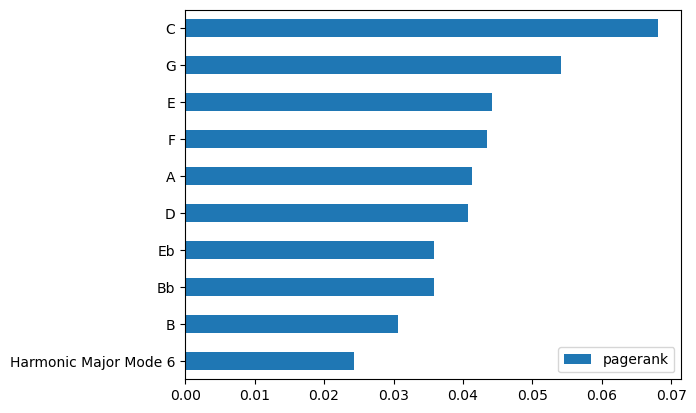

In [267]:
show_top_pagerank(G) # hard to use and understand, but C is dominant

# Bipartite Projection - Scales

In [302]:
# this is a bipartite network - scales and notes
edgelist[0:10]

[('Aeolian', 'C'),
 ('Aeolian', 'D'),
 ('Aeolian', 'Eb'),
 ('Aeolian', 'F'),
 ('Aeolian', 'G'),
 ('Aeolian', 'Ab'),
 ('Aeolian', 'Bb'),
 ('Aeolian', 'C'),
 ('Blues Scale', 'C'),
 ('Blues Scale', 'Eb')]

In [303]:
edgelist_df = pd.DataFrame(edgelist)
edgelist_df.columns = ['scale', 'note']
edgelist_df.head()

,scale,note
0,Aeolian,C
1,Aeolian,D
2,Aeolian,Eb
3,Aeolian,F
4,Aeolian,G


In [320]:
B = nx.from_pandas_edgelist(edgelist_df, source='scale', target='note') # new approach
G = bipartite.projected_graph(B, edgelist_df['scale'])

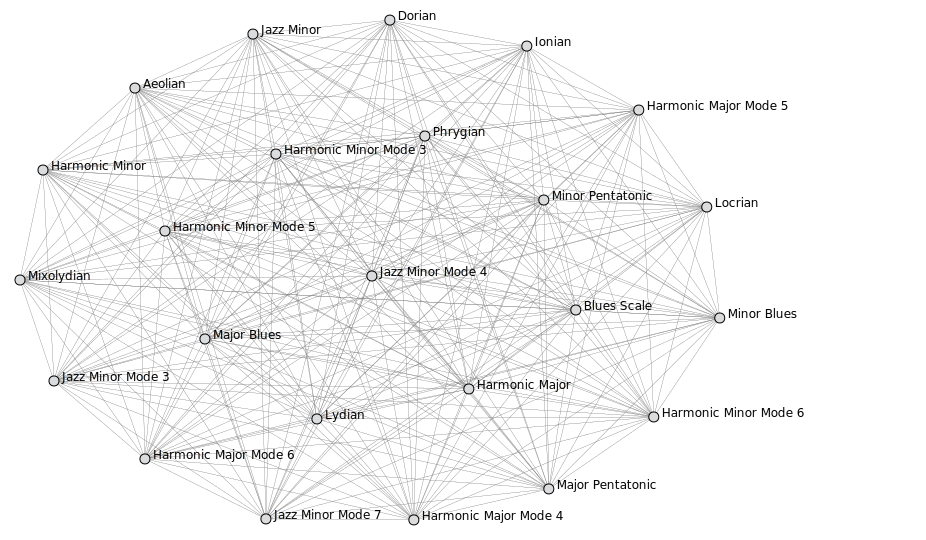

In [321]:
draw_graph(G, show_names=True, node_size=5, font_size=12, edge_width=0.2)

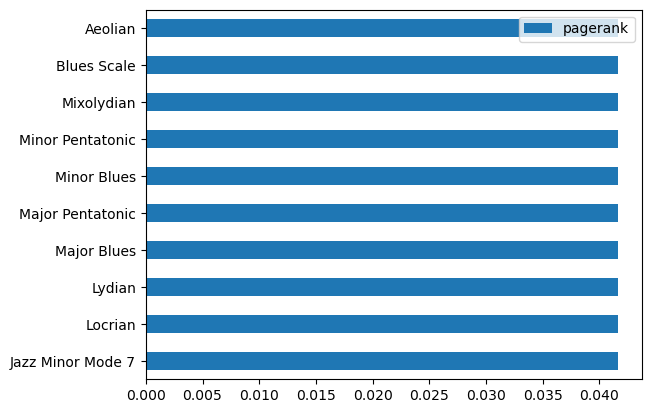

In [322]:
show_top_pagerank(G) # interesting; equal because same number of notes? will smaller scale show different?

# Ego Graph - Scales

These don't strike me as particularly useful. On another day, I will try using cosine similarity to identify which scales are most similar with each other. The note ego networks look more useful.

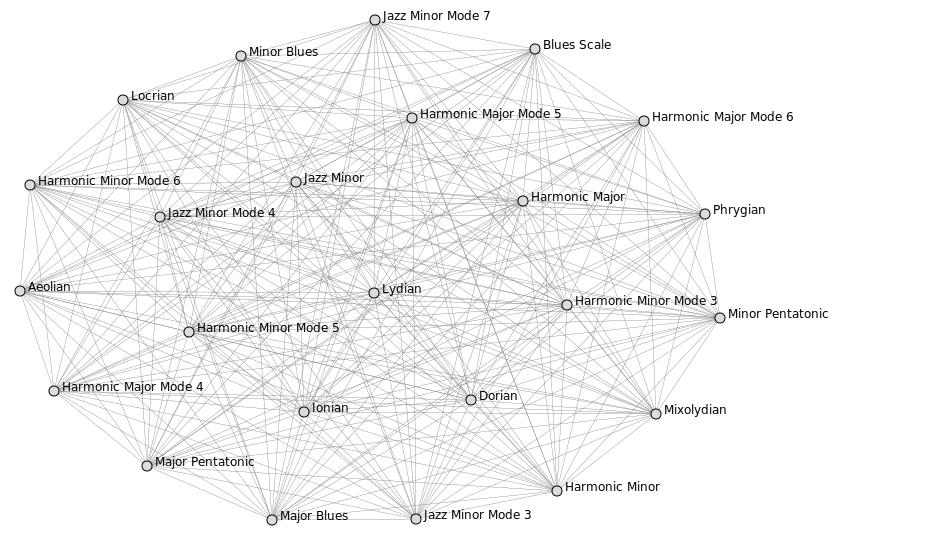

In [323]:
ego = nx.ego_graph(G, 'Major Blues')

draw_graph(ego, show_names=True, node_size=5, font_size=12, edge_width=0.2)

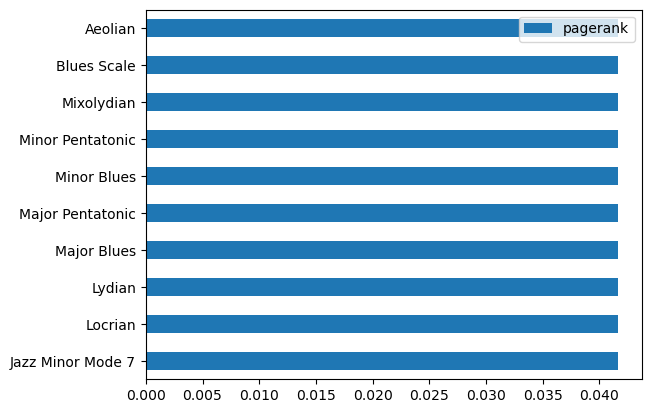

In [324]:
show_top_pagerank(ego)

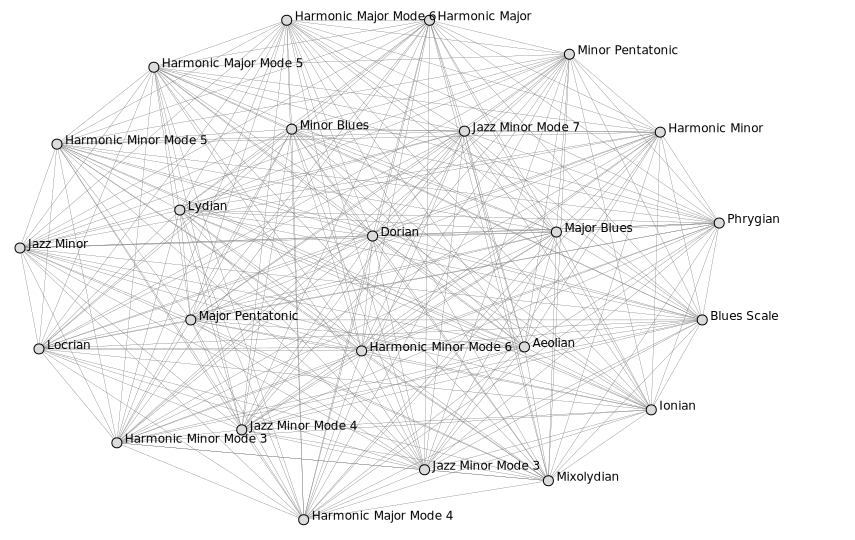

In [325]:
ego = nx.ego_graph(G, 'Harmonic Major Mode 6')

draw_graph(ego, show_names=True, node_size=5, font_size=12, edge_width=0.2)

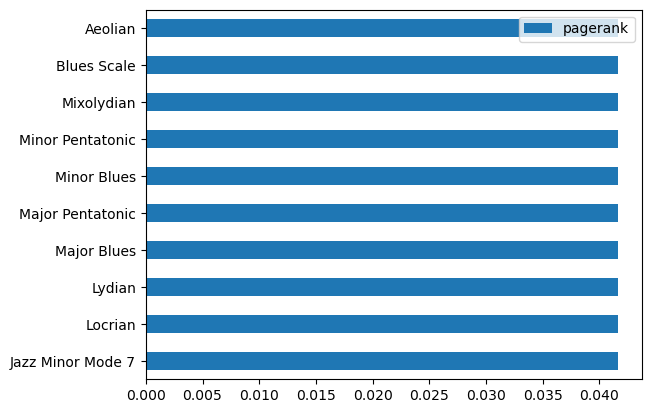

In [326]:
show_top_pagerank(ego)

# Bipartite Projection - Notes

In [327]:
B = nx.from_pandas_edgelist(edgelist_df, source='scale', target='note') # new approach
G = bipartite.projected_graph(B, edgelist_df['note'])

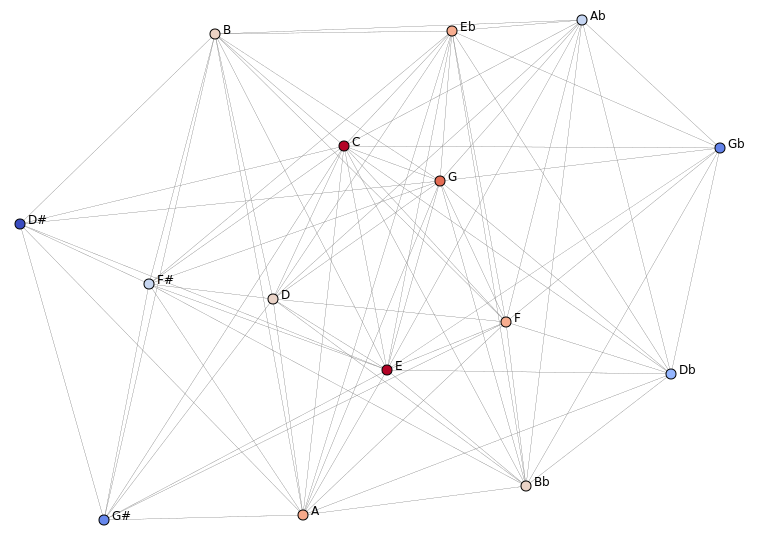

In [328]:
draw_graph(G, show_names=True, node_size=5, font_size=12, edge_width=0.2)

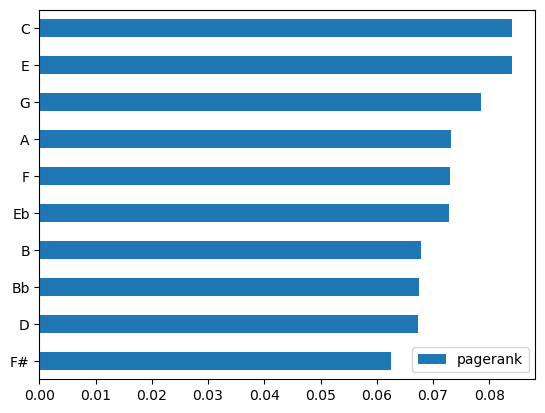

In [329]:
show_top_pagerank(G) # dominant notes across all scales included

# Ego Graph - Notes

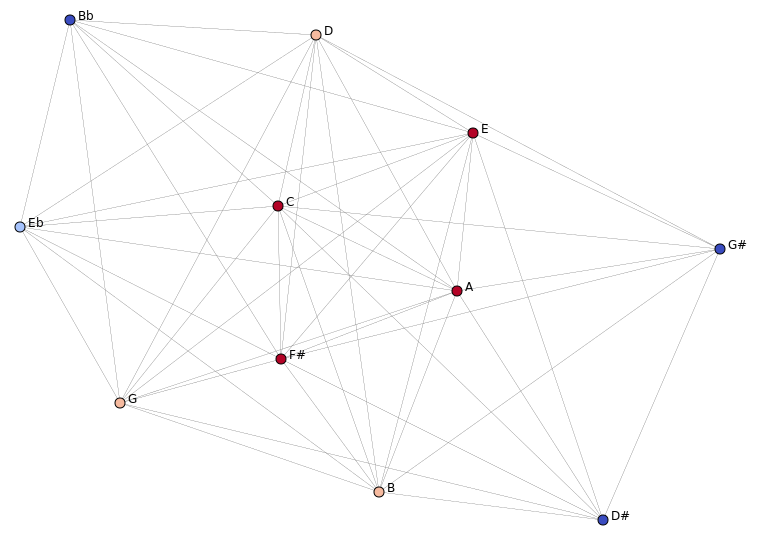

In [331]:
ego = nx.ego_graph(G, 'F#')

draw_graph(ego, show_names=True, node_size=5, font_size=12, edge_width=0.2)

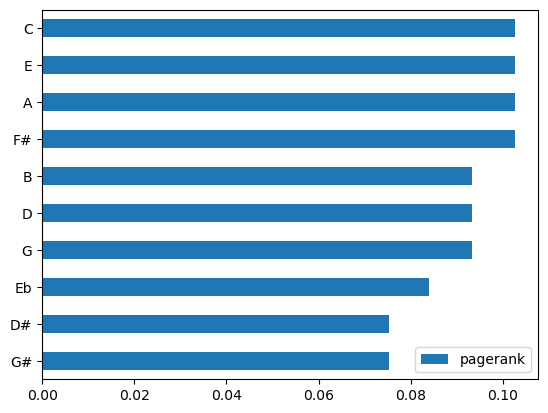

In [332]:
show_top_pagerank(ego)

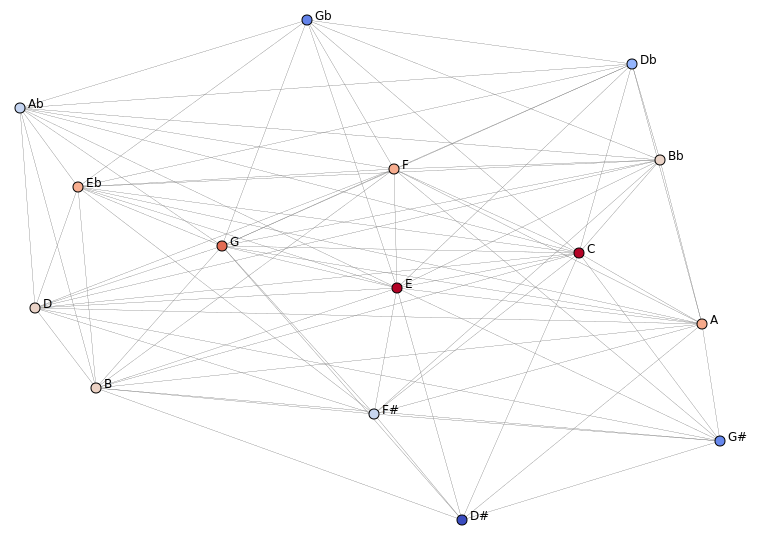

In [333]:
ego = nx.ego_graph(G, 'C')

draw_graph(ego, show_names=True, node_size=5, font_size=12, edge_width=0.2)

# wow pagerank really illuminates the notes that are commonly used with C
# from a guitarist's standpoint, these really stand out to me musically and make sense

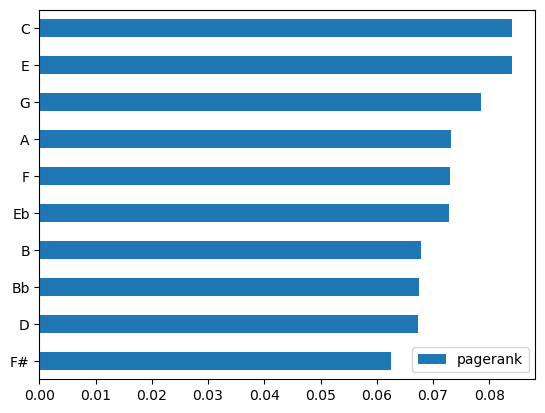

In [334]:
show_top_pagerank(ego)

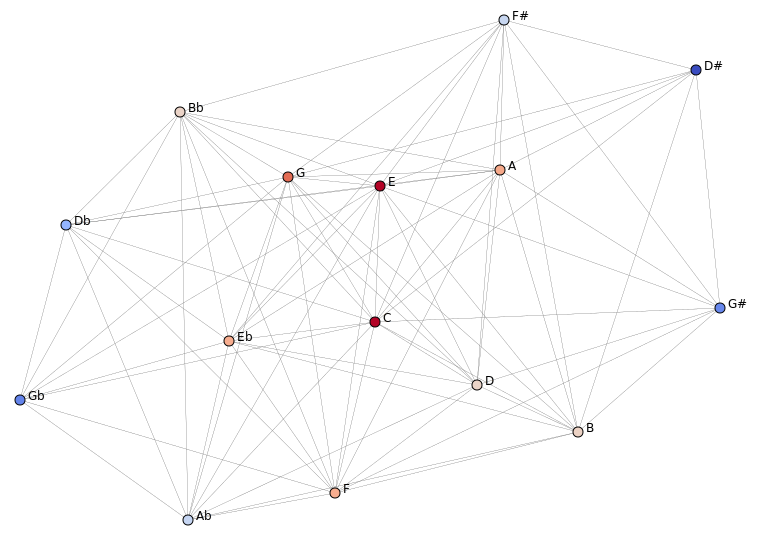

In [339]:
ego = nx.ego_graph(G, 'E')

draw_graph(ego, show_names=True, node_size=5, font_size=12, edge_width=0.2)

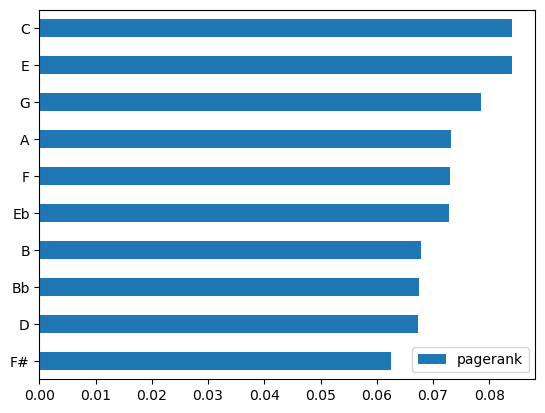

In [340]:
show_top_pagerank(ego)

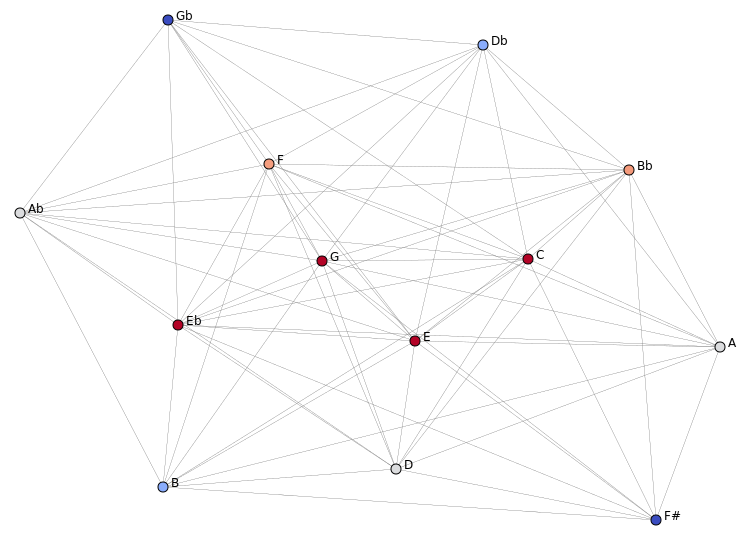

In [343]:
ego = nx.ego_graph(G, 'Eb')

draw_graph(ego, show_names=True, node_size=5, font_size=12, edge_width=0.2)

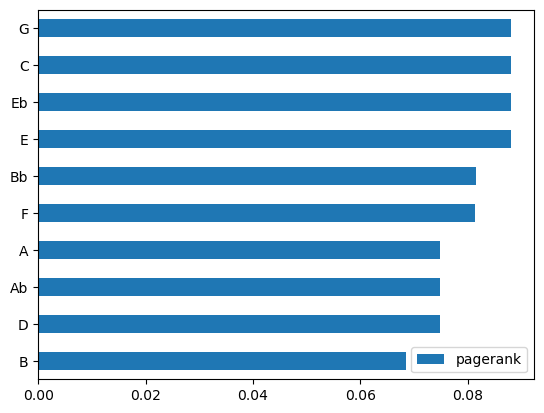

In [344]:
show_top_pagerank(ego)

# Choose a Scale to Learn

In [297]:
sorted(scales.keys())

['Aeolian',
 'Blues Scale',
 'Dorian',
 'Harmonic Major',
 'Harmonic Major Mode 4',
 'Harmonic Major Mode 5',
 'Harmonic Major Mode 6',
 'Harmonic Minor',
 'Harmonic Minor Mode 3',
 'Harmonic Minor Mode 5',
 'Harmonic Minor Mode 6',
 'Ionian',
 'Jazz Minor',
 'Jazz Minor Mode 3',
 'Jazz Minor Mode 4',
 'Jazz Minor Mode 7',
 'Locrian',
 'Lydian',
 'Major Blues',
 'Major Pentatonic',
 'Minor Blues',
 'Minor Pentatonic',
 'Mixolydian',
 'Phrygian']

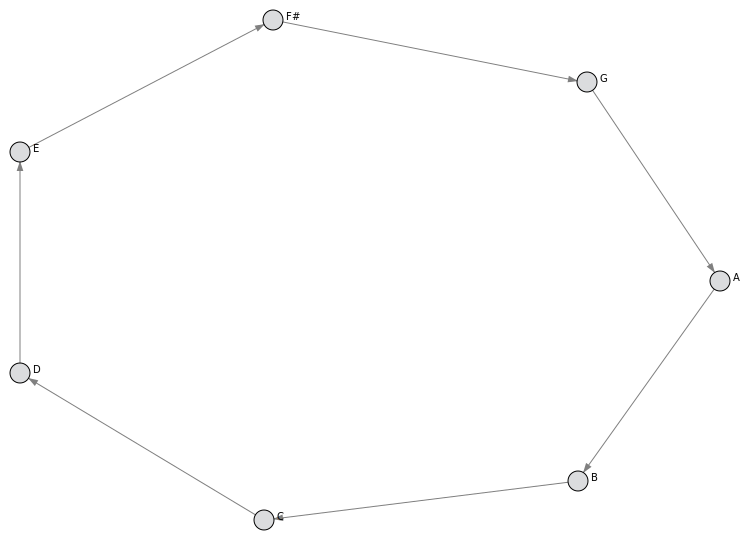

In [298]:
scale = scales['Lydian'].split()
G = nx.path_graph(scale, create_using=nx.DiGraph)
draw_graph(G, node_size=10, show_names=True, edge_width=1)

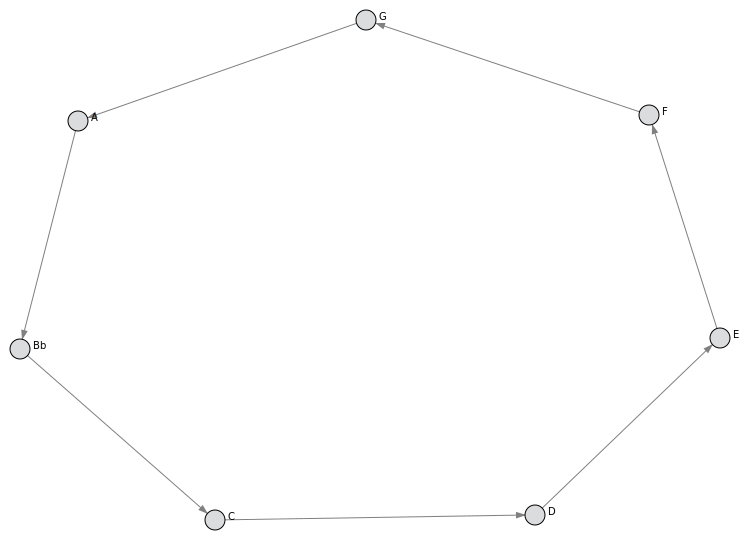

In [299]:
scale = scales['Mixolydian'].split()
G = nx.path_graph(scale, create_using=nx.DiGraph)
draw_graph(G, node_size=10, show_names=True, edge_width=1)